In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
def listdir_nohidden(path):
    f_list = [f for f in os.listdir(path) if not f.startswith('.')]
    return f_list
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import cartopy.crs as ccrs
import cartopy.feature as cft

In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
figures_path = '/home/561/erd561/figures/CMIP5/'
script_name = nb_name[:-6]
print('Figures will be saved in: ' + figures_path + script_name + '\n')

remote_domain = 'erd561@raijin.nci.org.au:'
remote_path = '/g/data/e14/erd561/CMIP5/Matt/'
local_path = remote_path

Figures will be saved in: /home/561/erd561/figures/CMIP5/p27_spaghetti_rcp85



In [4]:
u_10_hist_raw = xr.open_dataset('/g/data/e14/erd561/CMIP5/Paul/MMM/u_10_hist.nc', decode_times=False).U_10
u_10_hist = u_10_hist_raw.mean(dim='TIME')
print(u_10_hist)


u_10_rcp85_raw = xr.open_dataset('/g/data/e14/erd561/CMIP5/Paul/MMM/u_10_rcp85.nc', decode_times=False).U_10
u_10_rcp85 = u_10_rcp85_raw.mean(dim='TIME')
v_10_hist_raw = xr.open_dataset('/g/data/e14/erd561/CMIP5/Paul/MMM/v_10_hist.nc', decode_times=False).V_10
v_10_hist = v_10_hist_raw.mean(dim='TIME')
v_10_rcp85_raw = xr.open_dataset('/g/data/e14/erd561/CMIP5/Paul/MMM/v_10_rcp85.nc', decode_times=False).V_10
v_10_rcp85 = v_10_rcp85_raw.mean(dim='TIME')

<xarray.DataArray 'U_10' (LAT: 94, LON: 192)>
array([[-4.2788515 , -4.2788515 , -4.092235  , ..., -4.959082  ,
        -4.785187  , -4.785187  ],
       [-4.2788515 , -4.2788515 , -4.092235  , ..., -4.959082  ,
        -4.785187  , -4.785187  ],
       [-4.274554  , -4.274554  , -4.083707  , ..., -5.043017  ,
        -4.839954  , -4.839954  ],
       ...,
       [-0.10382451, -0.10382451, -0.18084316, ...,  0.24846825,
         0.14857894,  0.14857894],
       [-0.35853684, -0.35853684, -0.3940135 , ..., -0.19681695,
        -0.2351215 , -0.2351215 ],
       [-0.35853684, -0.35853684, -0.3940135 , ..., -0.19681695,
        -0.2351215 , -0.2351215 ]], dtype=float32)
Coordinates:
  * LAT      (LAT) float64 -88.54 -86.65 -84.75 -82.85 ... 84.75 86.65 88.54
  * LON      (LON) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1


In [5]:
model_list = sorted(listdir_nohidden(local_path + 'hist_1980-1999/u10/'))

uas_lat_list = {}

uas_5069_list = {}
uas_5069_zonavg_list = {}
uas_8099_list = {}
uas_8099_zonavg_list = {}
uas_rcp85_list = {}
uas_rcp85_zonavg_list = {}

uas_5069_zonavg_list_nice = []
uas_8099_zonavg_list_nice = []
uas_rcp85_zonavg_list_nice = []

uas_lat_unique = arange(-90,90,0.5)

for model in model_list:
    print(model)
    uas_lat_list[model] = xr.open_dataset(
        local_path + 'hist_1980-1999/u10/' + model, decode_times=False)['lat'][:]
    
    uas_5069_list[model] = xr.open_dataset(
        local_path + 'hist_1950-1969/u10/' + model, decode_times=False)['uas'][0,:,:]
    uas_5069_zonavg_list[model] = np.nanmean(uas_5069_list[model], axis = 1)
    
    uas_8099_list[model] = xr.open_dataset(
        local_path + 'hist_1980-1999/u10/' + model, decode_times=False)['uas'][0,:,:]
    uas_8099_zonavg_list[model] = np.nanmean(uas_8099_list[model], axis = 1)
    
    uas_rcp85_list[model] = xr.open_dataset(
        local_path + 'rcp85/u10/' + model, decode_times=False)['uas'][0,:,:]
    uas_rcp85_zonavg_list[model] = np.nanmean(uas_rcp85_list[model], axis = 1)
    
    if model in ['ACCESS1-0.nc']:
        print(np.shape(uas_5069_zonavg_list[model]))
        
        uas_5069_zonavg_list_nice = np.interp(uas_lat_unique, uas_lat_list[model], uas_5069_zonavg_list[model])
        uas_8099_zonavg_list_nice = np.interp(uas_lat_unique, uas_lat_list[model], uas_8099_zonavg_list[model])
        uas_rcp85_zonavg_list_nice = np.interp(uas_lat_unique, uas_lat_list[model], uas_rcp85_zonavg_list[model])
        
        print(np.shape(uas_5069_zonavg_list_nice))
        
    else:
        print(np.shape(uas_5069_zonavg_list[model]))
        
        uas_5069_zonavg_list_nice = np.dstack((
            uas_5069_zonavg_list_nice, 
            np.interp(uas_lat_unique, uas_lat_list[model], uas_5069_zonavg_list[model])))

        uas_8099_zonavg_list_nice = np.dstack((
            uas_8099_zonavg_list_nice, 
            np.interp(uas_lat_unique, uas_lat_list[model], uas_8099_zonavg_list[model])))
            
        uas_rcp85_zonavg_list_nice = np.dstack((
            uas_rcp85_zonavg_list_nice, 
            np.interp(uas_lat_unique, uas_lat_list[model], uas_rcp85_zonavg_list[model])))
        
        print(np.shape(uas_5069_zonavg_list_nice))
        
        
    
#     print(model + ' OK!')
    
uas_5069_zonavg_MMM = np.squeeze(np.mean(uas_5069_zonavg_list_nice, axis=2))
uas_8099_zonavg_MMM = np.squeeze(np.mean(uas_8099_zonavg_list_nice, axis=2))
uas_rcp85_zonavg_MMM = np.squeeze(np.mean(uas_rcp85_zonavg_list_nice, axis=2))

print(np.shape(uas_5069_zonavg_MMM))

#print(uas_list)

ACCESS1-0.nc
(144,)
(361,)
ACCESS1-3.nc
(144,)
(1, 361, 2)
CMCC-CM.nc
(240,)
(1, 361, 3)
CMCC-CMS.nc
(96,)
(1, 361, 4)
CNRM-CM5.nc
(128,)
(1, 361, 5)
CSIRO-Mk3-6-0.nc
(96,)
(1, 361, 6)
CanESM2.nc
(64,)
(1, 361, 7)
FGOALS-s2.nc
(108,)
(1, 361, 8)
GFDL-CM3.nc
(90,)
(1, 361, 9)
GFDL-ESM2G.nc
(90,)
(1, 361, 10)
GFDL-ESM2M.nc
(90,)
(1, 361, 11)
HadGEM2-AO.nc
(144,)
(1, 361, 12)
IPSL-CM5A-LR.nc
(96,)
(1, 361, 13)
IPSL-CM5A-MR.nc
(143,)
(1, 361, 14)
IPSL-CM5B-LR.nc
(96,)
(1, 361, 15)
MIROC-ESM-CHEM.nc
(64,)
(1, 361, 16)
MIROC-ESM.nc
(64,)
(1, 361, 17)
MPI-ESM-MR.nc
(96,)
(1, 361, 18)
MRI-CGCM3.nc
(160,)
(1, 361, 19)
MRI-ESM1.nc
(160,)
(1, 361, 20)
NorESM1-M.nc
(96,)
(1, 361, 21)
(361,)


Bbox(x0=0.125, y0=0.6579411764705883, x1=0.9, y1=0.88)
[0.125, 0.6679411764705883, 0.9, 1.03]
Bbox(x0=0.125, y0=0.3914705882352941, x1=0.9, y1=0.6135294117647059)
[0.125, 0.3814705882352941, 0.9, 0.6035294117647059]
Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.34705882352941175)
[0.125, 0.125, 0.9, 0.34705882352941175]


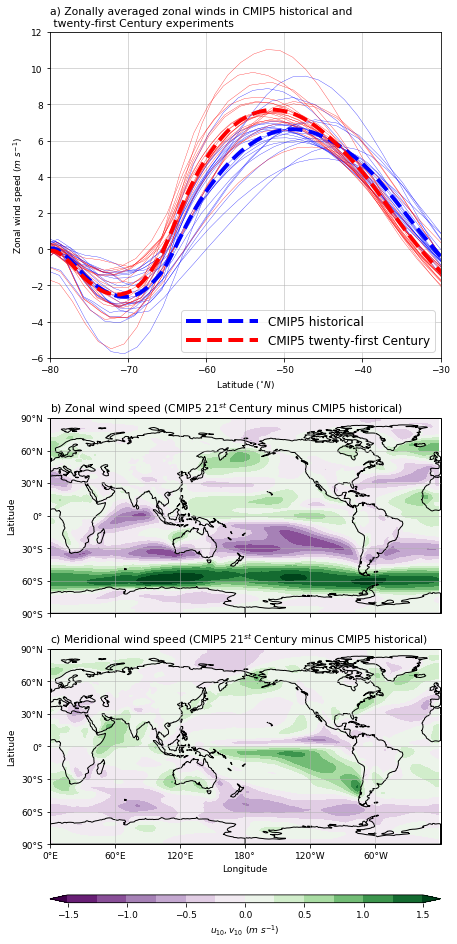

In [41]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)


# General plotting stuff
plot_labels=['(a) ','(b) ','(c) ','(d)']
land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='',
                                    linewidth=1)

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

import pylab as plot
params = {'legend.handlelength': 6}
plot.rcParams.update(params)

row = 3
col = 1
fig = plt.figure()
fig.set_size_inches(7,12.5)
matplotlib.rcParams.update({'font.size': 9}) 

ax = plt.subplot2grid((row, col), (0, 0), rowspan=1, colspan=1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.01, pos.x1, pos.y1+0.15] 
print(pos_plot)
cmap = plt.get_cmap('seismic')
step = 1
contf_lvls = np.arange(-10,10+1e-08,step)

for model in model_list:
    plt.plot(uas_lat_list[model], uas_5069_zonavg_list[model], 
             linestyle='-', linewidth=0.3, alpha=1, color='b')

for model in model_list:
    plt.plot(uas_lat_list[model], uas_rcp85_zonavg_list[model], 
             linestyle='-', linewidth=0.3, alpha=1, color='r')

ax.set_position(bbox(pos_plot))
p1, = plt.plot(uas_lat_unique, uas_5069_zonavg_MMM, linewidth=4, color='b',  linestyle='--')
p2, = plt.plot(uas_lat_unique, uas_rcp85_zonavg_MMM, linewidth=4, color='r',  linestyle='--')

plt.legend((p1, p2), ('CMIP5 historical', 'CMIP5 twenty-first Century'), loc='lower right',
          fontsize = 12)

plt.grid(linewidth=0.5)
plt.xlim(-80, -30)
plt.ylim(-6, 12)
plt.title('a) Zonally averaged zonal winds in CMIP5 historical and \n '\
          'twenty-first Century experiments', loc='left')
plt.xlabel('Latitude ($^{\circ}N$)')
plt.ylabel('Zonal wind speed ($m\ s^{-1}$)')

ax = plt.subplot2grid((row, col), (1, 0), rowspan=1, colspan=1, 
                          projection=ccrs.PlateCarree(central_longitude=180))
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.01, pos.x1, pos.y1-0.01] 
print(pos_plot)
anom = u_10_rcp85 - u_10_hist
cont_lev = arange(-1.5,1.5,0.25)
ax.add_feature(land_50m)
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree(central_longitude=180))
ax.set_xticks([-180, -120, -60, 0, 60, 120], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
contf = anom.plot.contourf(add_colorbar=False, levels=cont_lev, 
                           cmap=plt.cm.PRGn, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
plt.grid(linewidth=0.5)
plt.title(r'b) Zonal wind speed (CMIP5 $21^{st}$ Century minus CMIP5 historical)', loc='left')
plt.xlabel('')
plt.gca().set_xticklabels('')
plt.ylabel('Latitude')

ax = plt.subplot2grid((row, col),(2, 0), rowspan=1, colspan=1, 
                          projection=ccrs.PlateCarree(central_longitude=180))
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1, pos.y1] 
print(pos_plot)
anom = v_10_rcp85 - v_10_hist
ax.add_feature(land_50m)
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree(central_longitude=180))
ax.set_xticks([-180, -120, -60, 0, 60, 120], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
contf = anom.plot.contourf(add_colorbar=False, levels=cont_lev, 
                           cmap=plt.cm.PRGn, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
plt.grid(linewidth=0.5)
plt.title(r'c) Meridional wind speed (CMIP5 $21^{st}$ Century minus CMIP5 historical)', loc='left')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

axins = inset_axes(ax,
                   width="100%",  # width = 5% of parent_bbox width
                   height="4%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -0.3, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(contf, orientation='horizontal', 
                    label=r'$u_{10},v_{10}$ ($m\ s^{-1}$)', cax=axins)

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig2_' + '.png', bbox_inches='tight', dpi=300)